In [118]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import quandl
import datetime

In [119]:
tcsdata = quandl.get('NSE/TCS', start_date = '2015-03-01' , end_date = '2016-03-01' )

In [120]:
infydata = quandl.get('NSE/INFY' ,start_date = '2015-03-01' , end_date = '2016-03-01')

In [121]:
tcsdata.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2015-03-02,2679.7,2708.95,2652.55,2673.95,2669.40,1088019.0,28995.36
2015-03-03,2682.0,2790.00,2676.15,2785.10,2776.00,1712154.0,47055.77
2015-03-04,2788.0,2812.10,2715.65,2740.00,2746.00,1931497.0,53368.06
2015-03-05,2750.0,2770.70,2681.05,2690.10,2696.45,1086757.0,29490.13
2015-03-09,2640.0,2679.80,2610.00,2649.00,2646.80,1441587.0,38169.22


In [122]:
def window4(df):
    return df.rolling(window=4).mean()

In [123]:
def rolling10(df):
    return df.rolling(window=10).mean()

In [124]:
tcsdata['prevdayvol'] = tcsdata['Total Trade Quantity'].shift(-1)

In [125]:
tcsdata['volchange'] = abs((tcsdata['Total Trade Quantity']-tcsdata['prevdayvol'])/tcsdata['prevdayvol'])

In [126]:
tcsdata

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),prevdayvol,volchange
Date,,,,,,,,,
2015-03-02,2679.70,2708.95,2652.55,2673.95,2669.40,1088019.0,28995.36,1712154.0,0.364532
2015-03-03,2682.00,2790.00,2676.15,2785.10,2776.00,1712154.0,47055.77,1931497.0,0.113561
2015-03-04,2788.00,2812.10,2715.65,2740.00,2746.00,1931497.0,53368.06,1086757.0,0.777303
2015-03-05,2750.00,2770.70,2681.05,2690.10,2696.45,1086757.0,29490.13,1441587.0,0.246138
2015-03-09,2640.00,2679.80,2610.00,2649.00,2646.80,1441587.0,38169.22,1518526.0,0.050667
2015-03-10,2648.90,2678.25,2595.25,2638.85,2642.70,1518526.0,39979.41,1120100.0,0.355706
2015-03-11,2642.00,2659.95,2597.80,2605.15,2606.55,1120100.0,29379.09,913818.0,0.225736
2015-03-12,2623.90,2624.90,2590.10,2618.20,2619.05,913818.0,23821.00,793419.0,0.151747
2015-03-13,2638.00,2639.95,2575.00,2585.00,2582.35,793419.0,20587.21,778148.0,0.019625


In [127]:
tcsdata['Volume_Shocks'] = pd.cut(tcsdata['volchange'], bins = [0,0.1,1], labels = ['1','0'])

In [128]:
tcsdata.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),prevdayvol,volchange,Volume_Shocks
Date,,,,,,,,,,
2015-03-02,2679.7,2708.95,2652.55,2673.95,2669.40,1088019.0,28995.36,1712154.0,0.364532,0
2015-03-03,2682.0,2790.00,2676.15,2785.10,2776.00,1712154.0,47055.77,1931497.0,0.113561,0
2015-03-04,2788.0,2812.10,2715.65,2740.00,2746.00,1931497.0,53368.06,1086757.0,0.777303,0
2015-03-05,2750.0,2770.70,2681.05,2690.10,2696.45,1086757.0,29490.13,1441587.0,0.246138,0
2015-03-09,2640.0,2679.80,2610.00,2649.00,2646.80,1441587.0,38169.22,1518526.0,0.050667,1


In [129]:
tcsdata.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),prevdayvol,volchange,Volume_Shocks
Date,,,,,,,,,,
2015-03-02,2679.7,2708.95,2652.55,2673.95,2669.40,1088019.0,28995.36,1712154.0,0.364532,0
2015-03-03,2682.0,2790.00,2676.15,2785.10,2776.00,1712154.0,47055.77,1931497.0,0.113561,0
2015-03-04,2788.0,2812.10,2715.65,2740.00,2746.00,1931497.0,53368.06,1086757.0,0.777303,0
2015-03-05,2750.0,2770.70,2681.05,2690.10,2696.45,1086757.0,29490.13,1441587.0,0.246138,0
2015-03-09,2640.0,2679.80,2610.00,2649.00,2646.80,1441587.0,38169.22,1518526.0,0.050667,1


In [130]:
tcsdata['closechange'] = abs((tcsdata['Close']-(tcsdata['Close'].shift(-1)))/(tcsdata['Close'].shift(-1)))

In [131]:
tcsdata.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),prevdayvol,volchange,Volume_Shocks,closechange
Date,,,,,,,,,,,
2015-03-02,2679.7,2708.95,2652.55,2673.95,2669.40,1088019.0,28995.36,1712154.0,0.364532,0,0.038401
2015-03-03,2682.0,2790.00,2676.15,2785.10,2776.00,1712154.0,47055.77,1931497.0,0.113561,0,0.010925
2015-03-04,2788.0,2812.10,2715.65,2740.00,2746.00,1931497.0,53368.06,1086757.0,0.777303,0,0.018376
2015-03-05,2750.0,2770.70,2681.05,2690.10,2696.45,1086757.0,29490.13,1441587.0,0.246138,0,0.018759
2015-03-09,2640.0,2679.80,2610.00,2649.00,2646.80,1441587.0,38169.22,1518526.0,0.050667,1,0.001551


In [132]:
tcsdata['Price_Shocks'] = pd.cut(tcsdata['closechange'], bins = [0,0.2,1], labels = ['1','0'])

In [133]:
tcsdata.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),prevdayvol,volchange,Volume_Shocks,closechange,Price_Shocks
Date,,,,,,,,,,,,
2015-03-02,2679.7,2708.95,2652.55,2673.95,2669.40,1088019.0,28995.36,1712154.0,0.364532,0,0.038401,1
2015-03-03,2682.0,2790.00,2676.15,2785.10,2776.00,1712154.0,47055.77,1931497.0,0.113561,0,0.010925,1
2015-03-04,2788.0,2812.10,2715.65,2740.00,2746.00,1931497.0,53368.06,1086757.0,0.777303,0,0.018376,1
2015-03-05,2750.0,2770.70,2681.05,2690.10,2696.45,1086757.0,29490.13,1441587.0,0.246138,0,0.018759,1
2015-03-09,2640.0,2679.80,2610.00,2649.00,2646.80,1441587.0,38169.22,1518526.0,0.050667,1,0.001551,1


In [134]:
import bokeh
from bokeh.plotting import figure, output_file, show

In [141]:
# A - plot of close prices of stocks/indices (graph A)


p = figure(plot_width=600,plot_height=600)
p.patch(tcsdata.index,tcsdata.Close, alpha=0.5, line_width=2)
show(p)

In [142]:
#B - plot based on difference of 52 week moving average (Grapf B)


from bokeh.transform import linear_cmap
from bokeh.palettes import Spectral
from bokeh.models import ColumnDataSource, ColorBar
source1 = ColumnDataSource(dict(x=tcsdata.Open,y=tcsdata.Close))
a = figure(plot_width=600, plot_height=600, title="Linear Color Map Based on Y")
x = tcsdata.Open
y = tcsdata.Close
mapper = linear_cmap(field_name='y', palette=['blue'],low=min(y) ,high=max(y))
a.circle(x='x', y='y', line_color=mapper,color=mapper, fill_alpha=1, size=12, source=source1)

color_bar = ColorBar(color_mapper=mapper['transform'], width=8,  location=(0,0))
a.add_layout(color_bar, 'right')
show(a)

In [137]:
difference = tcsdata.Close - window4(tcsdata).Close
difference.head()

Date
2015-03-02        NaN
2015-03-03        NaN
2015-03-04        NaN
2015-03-05   -25.5125
2015-03-09   -69.5125
Name: Close, dtype: float64

In [144]:
# C - closing Pricing shock without volume shock to identify volumeless price movement (Graph C)

c = figure(plot_width=600, plot_height=600)
c.patch(tcsdata.index,difference, alpha=0.5, line_width=2,color = 'blue')
show(c)

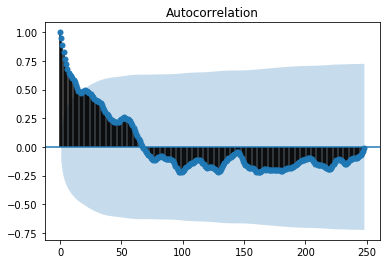

In [145]:
# D - autocorrelation (Graph D)

from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

closingseries = tcsdata.Close
plot_acf(closingseries)

pyplot.show()